In [ ]:
import pandas as pd
import os
filepath = 'C:/Users/dmarc/Desktop/EWELD_Energy_project/data/EWELD_raw/Extreme Weather/'
# Take all CSV files in folder structure
all_csv_files = []
for root, dirs, files in os.walk(filepath):
    for file in files:
        if file.endswith('.csv'):
            full_path = os.path.join(root, file)
            all_csv_files.append(full_path)

print(f"Found {len(all_csv_files)} CSV files total")

Found 61 CSV files total


In [3]:
os.listdir(filepath)

['count_20class_interval_df.csv',
 'EW_CT1',
 'EW_CT2',
 'EW_CT3',
 'Extreme weather classification criterion.xlsx']

In [5]:
subfolders = ['EW_CT1', 'EW_CT2', 'EW_CT3']

dataframes = []
for subfolder in subfolders:
    subfolder_path = os.path.join(filepath, subfolder)
    for file in os.listdir(subfolder_path):
        if file.endswith('.csv'):
            file_path = os.path.join(subfolder_path, file)
            df = pd.read_csv(file_path)
            # Optionally add a column with the subfolder name or file source
            df['City'] = subfolder[3:]
            dataframes.append(df)

# Concatenate all dataframes
weather_extreme = pd.concat(dataframes, ignore_index=True)

In [ ]:
weather_extreme.isna().sum()

In [6]:
filtered_StartTime1 = weather_extreme[weather_extreme['Start Time.1'].notnull()]

In [8]:
# Remove the 'Time' column
filtered_StartTime1 = filtered_StartTime1.drop(columns=['Time'])
# Rename 'Start Time' to 'Time' & 'Start Time.1' to 'Start Time'
filtered_StartTime1 = filtered_StartTime1.rename(columns={'Start Time': 'Time'})
filtered_StartTime1 = filtered_StartTime1.rename(columns={'Start Time.1': 'Start Time'})
# Reorder columns
filtered_StartTime1 = filtered_StartTime1[['Time', 'Start Time', 'End Time', 'Weather', 'City']]
filtered_StartTime1

,Time,Start Time,End Time,Weather,City
1851,2016-07-10,2016-07-10 00:00:00,2016-07-10 02:00:00,08Tropical Storm,CT1
1852,2016-08-02,2016-08-02 10:00:00,2016-08-02 22:00:00,08Tropical Storm,CT1
1853,2016-08-18,2016-08-18 05:00:00,2016-08-18 21:00:00,08Tropical Storm,CT1
1854,2016-09-15,2016-09-15 10:00:00,2016-09-15 15:00:00,08Tropical Storm,CT1
1855,2016-09-28,2016-09-28 11:00:00,2016-09-28 22:00:00,08Tropical Storm,CT1
...,...,...,...,...,...
5469,2022-11-01,2022-11-01 17:00:00,2022-11-01 23:00:00,10Typhoon,CT3
5470,2016-08-02,2016-08-02 01:00:00,2016-08-02 03:00:00,11Strong Typhoon,CT3
5471,2016-10-21,2016-10-21 00:00:00,2016-10-21 13:00:00,11Strong Typhoon,CT3
5472,2017-08-23,2017-08-23 06:00:00,2017-08-23 13:00:00,11Strong Typhoon,CT3


In [7]:
filtered_StartTime1

,Time,Start Time,End Time,Weather,City,Start Time.1
1851,NaN,2016-07-10,2016-07-10 02:00:00,08Tropical Storm,CT1,2016-07-10 00:00:00
1852,NaN,2016-08-02,2016-08-02 22:00:00,08Tropical Storm,CT1,2016-08-02 10:00:00
1853,NaN,2016-08-18,2016-08-18 21:00:00,08Tropical Storm,CT1,2016-08-18 05:00:00
1854,NaN,2016-09-15,2016-09-15 15:00:00,08Tropical Storm,CT1,2016-09-15 10:00:00
1855,NaN,2016-09-28,2016-09-28 22:00:00,08Tropical Storm,CT1,2016-09-28 11:00:00
...,...,...,...,...,...,...
5469,NaN,2022-11-01,2022-11-01 23:00:00,10Typhoon,CT3,2022-11-01 17:00:00
5470,NaN,2016-08-02,2016-08-02 03:00:00,11Strong Typhoon,CT3,2016-08-02 01:00:00
5471,NaN,2016-10-21,2016-10-21 13:00:00,11Strong Typhoon,CT3,2016-10-21 00:00:00
5472,NaN,2017-08-23,2017-08-23 13:00:00,11Strong Typhoon,CT3,2017-08-23 06:00:00


In [9]:
filtered_StartTime1.isna().sum()

Time          0
Start Time    0
End Time      0
Weather       0
City          0
dtype: int64

In [10]:
filtered_StartTime = weather_extreme[weather_extreme['Start Time.1'].isnull()]
filtered_StartTime

,Time,Start Time,End Time,Weather,City,Start Time.1
0,2015-01-01,2015-01-01 00:30:00,2015-01-01 00:30:00,01Low temperature,CT1,NaN
1,2015-01-02,2015-01-02 00:30:00,2015-01-02 23:30:00,01Low temperature,CT1,NaN
2,2015-01-03,2015-01-03 01:15:00,2015-01-03 08:15:00,01Low temperature,CT1,NaN
3,2015-01-04,2015-01-04 04:15:00,2015-01-04 08:00:00,01Low temperature,CT1,NaN
4,2015-01-08,2015-01-08 05:00:00,2015-01-08 08:15:00,01Low temperature,CT1,NaN
...,...,...,...,...,...,...
5736,2021-10-10,2021-10-10 06:00:00,2021-10-10 13:45:00,18Heavy T-Storm with Windy,CT3,NaN
5737,2022-06-07,2022-06-07 03:30:00,2022-06-07 03:45:00,18Heavy T-Storm with Windy,CT3,NaN
5738,2022-08-08,2022-08-08 09:30:00,2022-08-08 09:45:00,18Heavy T-Storm with Windy,CT3,NaN
5739,2022-09-19,2022-09-19 03:30:00,2022-09-19 03:45:00,18Heavy T-Storm with Windy,CT3,NaN


In [11]:
filtered_StartTime = filtered_StartTime.drop(columns=['Start Time.1'])

In [12]:
weather_extreme = pd.concat([filtered_StartTime1, filtered_StartTime], ignore_index=True)
weather_extreme.head()

,Time,Start Time,End Time,Weather,City
0,2016-07-10,2016-07-10 00:00:00,2016-07-10 02:00:00,08Tropical Storm,CT1
1,2016-08-02,2016-08-02 10:00:00,2016-08-02 22:00:00,08Tropical Storm,CT1
2,2016-08-18,2016-08-18 05:00:00,2016-08-18 21:00:00,08Tropical Storm,CT1
3,2016-09-15,2016-09-15 10:00:00,2016-09-15 15:00:00,08Tropical Storm,CT1
4,2016-09-28,2016-09-28 11:00:00,2016-09-28 22:00:00,08Tropical Storm,CT1


In [13]:
weather_extreme.isna().sum()

Time          0
Start Time    0
End Time      0
Weather       0
City          0
dtype: int64

In [14]:
weather_extreme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741 entries, 0 to 5740
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Time        5741 non-null   object
 1   Start Time  5741 non-null   object
 2   End Time    5741 non-null   object
 3   Weather     5741 non-null   object
 4   City        5741 non-null   object
dtypes: object(5)
memory usage: 224.4+ KB


In [15]:
# Extract the numeric code (EWno)
weather_extreme['EWno'] = weather_extreme['Weather'].str.extract(r'^(\d{2})')

# Extract the text (Extreme Weather)
weather_extreme['Extreme Weather'] = weather_extreme['Weather'].str.replace(r'^\d{2}', '', regex=True).str.strip()

weather_extreme = weather_extreme.drop(columns='Weather')

In [16]:
weather_extreme = weather_extreme.rename(columns={'Time': 'Date'})

In [21]:

filepath = r'C:/Users/dmarc/Desktop/EWELD_Energy_project/data/EWELD_raw/Weather Data'
# Take all CSV files in folder structure
all_csv_files = []
for root, dirs, files in os.walk(filepath):
    for file in files:
        if file.endswith('.csv'):
            full_path = os.path.join(root, file)
            all_csv_files.append(full_path)

print(f"Found {len(all_csv_files)} CSV files total")

Found 3 CSV files total


In [24]:
# List to hold all dataframes
dataframe = []

for file in os.listdir(filepath):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(filepath, file))
        # Add filename column (without .csv)
        df['source_file'] = file[:-4]
        dataframe.append(df)

# List to  dataframes
weather_data = pd.concat(dataframe)

In [25]:
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 824253 entries, 0 to 274750
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             824253 non-null  object 
 1   Temperature(F)   824253 non-null  float64
 2   Dew Point(F)     824253 non-null  float64
 3   Humidity(%)      824253 non-null  float64
 4   Wind             824253 non-null  object 
 5   Wind Speed(mph)  824253 non-null  float64
 6   Wind Gust(mph)   824253 non-null  float64
 7   Pressure(in)     824253 non-null  float64
 8   Condition        549502 non-null  object 
 9   source_file      824253 non-null  object 
dtypes: float64(6), object(4)
memory usage: 69.2+ MB
None


In [26]:
conditions_df = (weather_data['Condition'].astype(str)
                 .value_counts())
conditions_df.columns = ['Condition', 'Count']

conditions_df

Condition
nan                          274751
Fair                         229421
Partly Cloudy                133108
Mostly Cloudy                 63731
Light Rain                    23853
Fog                           23375
Cloudy                        21396
Light Rain Shower             18804
Haze                           6726
Fair / Windy                   6510
Partly Cloudy / Windy          5180
Light Rain with Thunder        3514
Rain Shower                    1922
T-Storm                        1844
Light Rain / Windy             1509
Light Rain Shower / Windy      1355
Showers in the Vicinity        1162
Rain                            918
Heavy T-Storm                   838
Thunder                         792
Heavy Rain Shower               583
Mostly Cloudy / Windy           549
Light Drizzle                   536
Rain Shower / Windy             359
Thunder in the Vicinity         322
Cloudy / Windy                  172
Heavy Rain Shower / Windy       170
Heavy T-Storm / Wi

In [27]:
weather_data['Condition'] = weather_data['Condition'].fillna('Unknown')
weather_data

,Time,Temperature(F),Dew Point(F),Humidity(%),Wind,Wind Speed(mph),Wind Gust(mph),Pressure(in),Condition,source_file
0,2015-01-01 00:00:00,53.170,39.22,59.12,CALM,0.000,0.0,30.14,Fair,W1
1,2015-01-01 00:15:00,52.735,39.14,60.90,CALM,1.970,0.0,29.89,Fair,W1
2,2015-01-01 00:30:00,52.300,39.06,62.68,ESE,3.940,0.0,29.64,Fair,W1
3,2015-01-01 00:45:00,53.395,39.06,59.82,ESE,2.955,0.0,29.70,Fair,W1
4,2015-01-01 01:00:00,54.490,39.05,56.97,VAR,1.970,0.0,29.76,Fair,W1
...,...,...,...,...,...,...,...,...,...,...
274746,2022-11-01 22:30:00,69.040,64.85,88.99,N,25.090,0.0,29.39,Partly Cloudy / Windy,W3
274747,2022-11-01 22:45:00,68.030,64.24,88.90,N,26.580,0.0,29.34,Partly Cloudy / Windy,W3
274748,2022-11-01 23:00:00,67.020,63.62,88.82,N,28.070,0.0,29.28,Partly Cloudy / Windy,W3
274749,2022-11-01 23:15:00,68.190,64.38,88.94,N,28.550,0.0,29.45,Partly Cloudy / Windy,W3


In [22]:
# List to hold all dataframes
dataframe = []

for file in os.listdir(filepath):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(filepath, file))
        # Add filename column (without .csv)
        df['source_file'] = file[:-4]
        dataframe.append(df)

# List to  dataframes
weather_data = pd.concat(dataframe)

In [28]:
# Replace values in 'source_file'
replace_dict = {'W1': 'CT1', 'W2': 'CT2', 'W3': 'CT3'}
weather_data['source_file'] = weather_data['source_file'].replace(replace_dict)

#  Rename the column
weather_data = weather_data.rename(columns={'source_file': 'City'})

In [29]:
weather_data['City'].value_counts()

City
CT1    274751
CT2    274751
CT3    274751
Name: count, dtype: int64

In [30]:
# check condition values by City
distribution = weather_data.groupby(['City', 'Condition']).size().unstack(fill_value=0)
distribution

Condition,Blowing Dust,Blowing Dust / Windy,Blowing Sand / Windy,Cloudy,Cloudy / Windy,Drizzle,Fair,Fair / Windy,Fog,Fog / Windy,...,Sleet / Windy,Smoke,Squalls,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder in the Vicinity,Unknown
City,,,,,,,,,,,,,,,,,,,,,
CT1,12,6,6,21396,172,12,102242,706,12016,0,...,0,12,2,2,820,28,596,12,10,0
CT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,274751
CT3,0,0,0,0,0,46,127179,5804,11359,56,...,2,9,0,0,1024,62,196,4,312,0


In [31]:
# transforms melt() to convert wide → long format
conditions_df = distribution.reset_index().melt(id_vars='City', var_name='Condition', value_name='Value')
conditions_df = conditions_df.pivot(index='Condition', columns='City', values='Value').reset_index()
conditions_df


City,Condition,CT1,CT2,CT3
0,Blowing Dust,12,0,0
1,Blowing Dust / Windy,6,0,0
2,Blowing Sand / Windy,6,0,0
3,Cloudy,21396,0,0
4,Cloudy / Windy,172,0,0
5,Drizzle,12,0,46
6,Fair,102242,0,127179
7,Fair / Windy,706,0,5804
8,Fog,12016,0,11359
9,Fog / Windy,0,0,56


In [32]:
# check Wind type values by City
distribution_wind = weather_data.groupby(['City', 'Wind']).size().unstack(fill_value=0)
distribution_wind

Wind,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW
City,,,,,,,,,,,,,,,,,,
CT1,8284,31752,22310,14056,30721,17130,24892,14346,3192,12298,19554,14556,5906,4892,44222,2256,1406,2978
CT2,3720,33160,51912,13080,17575,22056,14748,9912,4572,14172,27576,14928,9840,12612,2340,6780,3156,12612
CT3,1270,41435,9530,23609,56126,8405,17172,8057,1608,27329,16365,12219,22359,9076,11262,3682,1436,3811


In [33]:
def f_fromFtoC(x):
    return (x - 32) / 1.8

# Convert columns and add new columns for Celsius
weather_data['Temperature(C)'] = weather_data['Temperature(F)'].apply(f_fromFtoC)
weather_data['Dew Point(C)'] = weather_data['Dew Point(F)'].apply(f_fromFtoC)


In [34]:
def f_inHg_to_hPa(x):
    return x * 33.86389
weather_data['Pressure(hPa)'] = weather_data['Pressure(in)'].apply(f_inHg_to_hPa)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824253 entries, 0 to 274750
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             824253 non-null  object 
 1   Temperature(F)   824253 non-null  float64
 2   Dew Point(F)     824253 non-null  float64
 3   Humidity(%)      824253 non-null  float64
 4   Wind             824253 non-null  object 
 5   Wind Speed(mph)  824253 non-null  float64
 6   Wind Gust(mph)   824253 non-null  float64
 7   Pressure(in)     824253 non-null  float64
 8   Condition        824253 non-null  object 
 9   City             824253 non-null  object 
 10  Temperature(C)   824253 non-null  float64
 11  Dew Point(C)     824253 non-null  float64
 12  Pressure(hPa)    824253 non-null  float64
dtypes: float64(9), object(4)
memory usage: 88.0+ MB


In [35]:
# Remove  Columns
weather_data = weather_data.drop(columns=['Temperature(F)', 'Dew Point(F)','Pressure(in)'])
# Reorder  Columns
new_order = [
    'Time',
    'Temperature(C)',
    'Dew Point(C)',
    'Humidity(%)',
    'Wind',
    'Wind Speed(mph)',
    'Wind Gust(mph)',
    'Pressure(hPa)',
    'Condition',
    'City'
]

weather_data = weather_data[new_order]

weather_data.tail()

,Time,Temperature(C),Dew Point(C),Humidity(%),Wind,Wind Speed(mph),Wind Gust(mph),Pressure(hPa),Condition,City
274746,2022-11-01 22:30:00,20.577778,18.250000,88.99,N,25.09,0.0,995.259727,Partly Cloudy / Windy,CT3
274747,2022-11-01 22:45:00,20.016667,17.911111,88.90,N,26.58,0.0,993.566533,Partly Cloudy / Windy,CT3
274748,2022-11-01 23:00:00,19.455556,17.566667,88.82,N,28.07,0.0,991.534699,Partly Cloudy / Windy,CT3
274749,2022-11-01 23:15:00,20.105556,17.988889,88.94,N,28.55,0.0,997.291560,Partly Cloudy / Windy,CT3
274750,2022-11-01 23:30:00,20.755556,18.405556,89.07,N,29.03,0.0,1003.048422,Light Rain Shower / Windy,CT3


In [36]:
weather_data = weather_data.round({'Temperature(C)': 2, 'Dew Point(C)': 2})

In [37]:
weather_data.sample(6)

,Time,Temperature(C),Dew Point(C),Humidity(%),Wind,Wind Speed(mph),Wind Gust(mph),Pressure(hPa),Condition,City
59780,2016-09-14 17:00:00,30.69,22.58,59.51,NW,17.740000,0.0,977.989143,Unknown,CT2
119595,2018-05-30 18:45:00,29.92,26.70,77.71,SSW,12.520000,0.0,995.598366,Fair,CT3
114614,2018-04-08 21:30:00,18.70,12.68,66.26,SE,5.465000,0.0,1011.853033,Unknown,CT2
44931,2016-04-13 00:45:00,22.77,21.59,99.02,ENE,8.233333,0.0,1001.016588,Unknown,CT2
38786,2016-02-09 00:30:00,11.68,5.16,66.52,VAR,2.020000,0.0,1018.287172,Fair,CT1
189502,2020-05-27 23:30:00,25.98,23.20,90.12,ENE,6.463333,0.0,1015.239422,Unknown,CT2


In [38]:
weather_data = weather_data.round({'Temperature(C)': 2, 'Dew Point(C)': 2, 'Wind Speed(mph)':2, 'Pressure(hPa)':2})
# Convert 'Time' column to datetime
weather_data['Time'] = pd.to_datetime(weather_data['Time'])
weather_data.sample(10)

,Time,Temperature(C),Dew Point(C),Humidity(%),Wind,Wind Speed(mph),Wind Gust(mph),Pressure(hPa),Condition,City
225314,2021-06-05 00:30:00,23.47,20.05,81.70,NNW,7.11,0.0,1022.01,Fair,CT1
71502,2017-01-14 19:30:00,12.25,8.83,83.61,NNE,6.89,0.0,1029.12,Light Rain,CT1
9010,2015-04-04 20:30:00,25.86,24.24,95.84,ESE,7.98,0.0,998.65,Partly Cloudy,CT3
201587,2020-09-30 20:45:00,25.74,24.98,94.80,N,15.98,0.0,1005.76,Heavy T-Storm,CT3
266492,2022-08-07 23:00:00,31.04,23.16,61.02,E,7.12,0.0,1003.05,Fair,CT1
204824,2020-11-03 14:00:00,24.49,15.59,58.14,N,10.97,0.0,1026.41,Unknown,CT2
196721,2020-08-11 04:15:00,29.34,26.01,83.98,SSW,8.57,0.0,988.15,Fair,CT3
30261,2015-11-12 05:15:00,24.66,21.63,85.44,E,16.52,0.0,1019.98,Partly Cloudy,CT3
45886,2016-04-22 23:30:00,22.31,21.74,97.00,S,3.17,0.0,1017.95,Unknown,CT2
249046,2022-02-07 05:30:00,15.88,11.60,80.41,E,8.30,0.0,1012.87,Unknown,CT2


In [ ]:
#weather_data.to_csv(r'C:\Users\dmarc\Desktop\EWELD_Energy_project\data\processed\weather_data.csv', index=False)

In [41]:
weather_data

,Time,Temperature(C),Dew Point(C),Humidity(%),Wind,Wind Speed(mph),Wind Gust(mph),Pressure(hPa),Condition,City
0,2015-01-01 00:00:00,11.76,4.01,59.12,CALM,0.00,0.0,1020.66,Fair,CT1
1,2015-01-01 00:15:00,11.52,3.97,60.90,CALM,1.97,0.0,1012.19,Fair,CT1
2,2015-01-01 00:30:00,11.28,3.92,62.68,ESE,3.94,0.0,1003.73,Fair,CT1
3,2015-01-01 00:45:00,11.89,3.92,59.82,ESE,2.96,0.0,1005.76,Fair,CT1
4,2015-01-01 01:00:00,12.49,3.92,56.97,VAR,1.97,0.0,1007.79,Fair,CT1
...,...,...,...,...,...,...,...,...,...,...
274746,2022-11-01 22:30:00,20.58,18.25,88.99,N,25.09,0.0,995.26,Partly Cloudy / Windy,CT3
274747,2022-11-01 22:45:00,20.02,17.91,88.90,N,26.58,0.0,993.57,Partly Cloudy / Windy,CT3
274748,2022-11-01 23:00:00,19.46,17.57,88.82,N,28.07,0.0,991.53,Partly Cloudy / Windy,CT3
274749,2022-11-01 23:15:00,20.11,17.99,88.94,N,28.55,0.0,997.29,Partly Cloudy / Windy,CT3


In [42]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824253 entries, 0 to 274750
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Time             824253 non-null  datetime64[ns]
 1   Temperature(C)   824253 non-null  float64       
 2   Dew Point(C)     824253 non-null  float64       
 3   Humidity(%)      824253 non-null  float64       
 4   Wind             824253 non-null  object        
 5   Wind Speed(mph)  824253 non-null  float64       
 6   Wind Gust(mph)   824253 non-null  float64       
 7   Pressure(hPa)    824253 non-null  float64       
 8   Condition        824253 non-null  object        
 9   City             824253 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 69.2+ MB


In [43]:
# Convert 'Times' column to datetime
weather_extreme['Start Time'] = pd.to_datetime(weather_extreme['Start Time'])
weather_extreme['End Time'] = pd.to_datetime(weather_extreme['End Time'])
weather_data['Time'] = pd.to_datetime(weather_data['Time'])

In [44]:
print(weather_extreme.head())

         Date          Start Time            End Time City EWno  \
0  2016-07-10 2016-07-10 00:00:00 2016-07-10 02:00:00  CT1   08   
1  2016-08-02 2016-08-02 10:00:00 2016-08-02 22:00:00  CT1   08   
2  2016-08-18 2016-08-18 05:00:00 2016-08-18 21:00:00  CT1   08   
3  2016-09-15 2016-09-15 10:00:00 2016-09-15 15:00:00  CT1   08   
4  2016-09-28 2016-09-28 11:00:00 2016-09-28 22:00:00  CT1   08   

  Extreme Weather  
0  Tropical Storm  
1  Tropical Storm  
2  Tropical Storm  
3  Tropical Storm  
4  Tropical Storm  


In [45]:
# Display converted
print("Time weather_datae:")
print(weather_data['Time'].info())

print("\nStart Time:")
print(weather_extreme['Start Time'].info())

print("\nEnd Time:")
print(weather_extreme['End Time'].info())

Time weather_datae:
<class 'pandas.core.series.Series'>
Index: 824253 entries, 0 to 274750
Series name: Time
Non-Null Count   Dtype         
--------------   -----         
824253 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.6 MB
None

Start Time:
<class 'pandas.core.series.Series'>
RangeIndex: 5741 entries, 0 to 5740
Series name: Start Time
Non-Null Count  Dtype         
--------------  -----         
5741 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 45.0 KB
None

End Time:
<class 'pandas.core.series.Series'>
RangeIndex: 5741 entries, 0 to 5740
Series name: End Time
Non-Null Count  Dtype         
--------------  -----         
5741 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 45.0 KB
None


In [46]:
# Count occurrences of each extreme weather type
extreme_weather_counts = weather_extreme['Extreme Weather'].value_counts().reset_index()
extreme_weather_counts.columns = ['Extreme Weather', 'Count']

# Display the result
print(extreme_weather_counts)

                 Extreme Weather  Count
0                   High humidty   2095
1               High temperature   1897
2                Low temperature    625
3          High heat and humidty    292
4                  Heavy T-Storm    273
5              Heavy Rain Shower    204
6                 Tropical Storm     85
7       Heavy T-Storm with Windy     73
8          Severe Tropical Storm     63
9                     Heavy Rain     39
10  Heavy Rain Shower with Windy     37
11                       Typhoon     33
12                Strong Typhoon     12
13           Damaging Wind Gusts      5
14      Very Damaging Wind Gusts      3
15         Heavy Rain with Windy      2
16                   Light Sleet      1
17            Violent Wind Gusts      1
18        Light Sleet with Windy      1


### weather_data

In [47]:
# weather_data dataframe Overview
print("Weather Data Overview:")
print(f"Total rows: {len(weather_data)}")
print(f"Time range: {weather_data['Time'].min()} to {weather_data['Time'].max()}")
print(f"Cities: {weather_data['City'].nunique()} unique cities")

print("\nExtreme Weather Data Overview:")
print(f"Total extreme events: {len(weather_extreme)}")
print(f"Time range: {weather_extreme['Start Time'].min()} to {weather_extreme['End Time'].max()}")
print(f"Cities with extremes: {weather_extreme['City'].nunique()} unique cities")
print("\nSample extreme events:")
print(weather_extreme[['City', 'Start Time', 'End Time', 'Extreme Weather']].head())

Weather Data Overview:
Total rows: 824253
Time range: 2015-01-01 00:00:00 to 2022-11-01 23:30:00
Cities: 3 unique cities

Extreme Weather Data Overview:
Total extreme events: 5741
Time range: 2015-01-01 00:30:00 to 2022-11-03 05:00:00
Cities with extremes: 3 unique cities

Sample extreme events:
  City          Start Time            End Time Extreme Weather
0  CT1 2016-07-10 00:00:00 2016-07-10 02:00:00  Tropical Storm
1  CT1 2016-08-02 10:00:00 2016-08-02 22:00:00  Tropical Storm
2  CT1 2016-08-18 05:00:00 2016-08-18 21:00:00  Tropical Storm
3  CT1 2016-09-15 10:00:00 2016-09-15 15:00:00  Tropical Storm
4  CT1 2016-09-28 11:00:00 2016-09-28 22:00:00  Tropical Storm


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns  

### Weather data to extrime weather match

In [49]:
# Check time overlap
time_overlap = ((weather_extreme['Start Time'].max() >= weather_data['Time'].min()) & 
                (weather_extreme['End Time'].min() <= weather_data['Time'].max()))
print(f"Time ranges overlap in weather_extreme: {time_overlap}")

Time ranges overlap in weather_extreme: True


In [50]:
# Check city alignment
common_cities = set(weather_data['City'].unique()) & set(weather_extreme['City'].unique())
common_cities_count = len(common_cities)

# Calculate time overlap metrics
start_max = weather_extreme['Start Time'].max()
end_min = weather_extreme['End Time'].min()
data_min = weather_data['Time'].min()
data_max = weather_data['Time'].max()
time_overlap = (start_max >= data_min) and (end_min <= data_max)

# Create summary table
summary_table = pd.DataFrame({
    'Metric': [
        'Cities in both datasets', 
        'Time ranges overlap',
        'Extreme max start time',
        'Extreme min end time',
        'Weather data min time',
        'Weather data max time'
    ],
    'Value': [
        common_cities_count,
        time_overlap,
        start_max,
        end_min,
        data_min,
        data_max
    ]
})

print("Data Alignment Summary:\n")
print(summary_table)


Data Alignment Summary:

                    Metric                Value
0  Cities in both datasets                    3
1      Time ranges overlap                 True
2   Extreme max start time  2022-11-02 14:00:00
3     Extreme min end time  2015-01-01 00:30:00
4    Weather data min time  2015-01-01 00:00:00
5    Weather data max time  2022-11-01 23:30:00


Match extreme weather events from weather_extreme with corresponding time periods in the main weather_data dataset

In [51]:
# Create a clean copy of the extreme weather data
extreme_clean = weather_extreme.dropna(subset=['City', 'Start Time', 'End Time']).copy()

# Count total periods in extreme_clean
total_extreme_periods = len(extreme_clean)
print(f"Total extreme weather periods to match: {total_extreme_periods}")

# Create a list to store matches and track which extreme periods were matched
matches = []
matched_extreme_indices = set()  # To track which extreme events found matches

# For each extreme event, find matching time periods in weather_data
for idx, event in extreme_clean.iterrows():
    mask = (
        (weather_data['City'] == event['City']) &
        (weather_data['Time'] >= event['Start Time']) &
        (weather_data['Time'] <= event['End Time'])
    )
    matching_rows = weather_data[mask]
    if not matching_rows.empty:
        matches.extend(matching_rows.index.tolist())
        matched_extreme_indices.add(idx)  # Record that this extreme event had matches

# Calculate statistics
matched_extreme_count = len(matched_extreme_indices)
unmatched_extreme_count = total_extreme_periods - matched_extreme_count
total_matches = len(matches)

print("\nVerification before merge:")
print(f"Total extreme weather periods: {total_extreme_periods}")
print(f"Extreme periods with matches: {matched_extreme_count}")
print(f"Extreme periods without matches: {unmatched_extreme_count}")
print(f"Total matching time periods found: {total_matches}")

# Now proceed with the merge as before
weather_data['Extreme Weather'] = 'no extreme weather'
weather_data['EWno'] = 0

if matches:
    matched_idx = list(set(matches))  # Remove duplicates
    weather_data.loc[matched_idx, 'Extreme Weather'] = extreme_clean.iloc[0]['Extreme Weather']
    weather_data.loc[matched_idx, 'EWno'] = extreme_clean.iloc[0]['EWno']

Total extreme weather periods to match: 5741

Verification before merge:
Total extreme weather periods: 5741
Extreme periods with matches: 5738
Extreme periods without matches: 3
Total matching time periods found: 146480


C:\Users\dmarc\AppData\Local\Temp\ipykernel_18312\115434691.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '08' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weather_data.loc[matched_idx, 'EWno'] = extreme_clean.iloc[0]['EWno']


In [52]:
# Final verification with size check
print("\nMerge results:")
extreme_counts = weather_data['Extreme Weather'].value_counts()
print(extreme_counts)
total_after_merge = extreme_counts.sum()
original_size = len(weather_data)
print(f"\nTotal matched time periods after merge: {len(matched_idx)}")
print(f"\nValidation check:")
print(f"Original dataset size: {original_size}")
print(f"Sum of all categories: {total_after_merge}")
print(f"Records accounted for: {'OK' if total_after_merge == original_size else 'MISMATCH'}")


Merge results:
Extreme Weather
no extreme weather    565869
Tropical Storm        258384
Name: count, dtype: int64

Total matched time periods after merge: 86128

Validation check:
Original dataset size: 824253
Sum of all categories: 824253
Records accounted for: OK


In [53]:
print("\nWeather_data with matches Extreme Weather Data Overview:")
print(f"Total extreme events: {len(weather_data)}")
print(f"Time range: {weather_data['Time'].min()} to {weather_data['Time'].max()}")
print(f"Cities with extremes: {weather_data['City'].nunique()} unique cities")
print("\nSample weather_data:")
print(weather_data[['City', 'Time', 'Extreme Weather']].tail())


Weather_data with matches Extreme Weather Data Overview:
Total extreme events: 824253
Time range: 2015-01-01 00:00:00 to 2022-11-01 23:30:00
Cities with extremes: 3 unique cities

Sample weather_data:
       City                Time Extreme Weather
274746  CT3 2022-11-01 22:30:00  Tropical Storm
274747  CT3 2022-11-01 22:45:00  Tropical Storm
274748  CT3 2022-11-01 23:00:00  Tropical Storm
274749  CT3 2022-11-01 23:15:00  Tropical Storm
274750  CT3 2022-11-01 23:30:00  Tropical Storm


In [54]:
weather_data


,Time,Temperature(C),Dew Point(C),Humidity(%),Wind,Wind Speed(mph),Wind Gust(mph),Pressure(hPa),Condition,City,Extreme Weather,EWno
0,2015-01-01 00:00:00,11.76,4.01,59.12,CALM,0.00,0.0,1020.66,Fair,CT1,no extreme weather,0
1,2015-01-01 00:15:00,11.52,3.97,60.90,CALM,1.97,0.0,1012.19,Fair,CT1,no extreme weather,0
2,2015-01-01 00:30:00,11.28,3.92,62.68,ESE,3.94,0.0,1003.73,Fair,CT1,Tropical Storm,08
3,2015-01-01 00:45:00,11.89,3.92,59.82,ESE,2.96,0.0,1005.76,Fair,CT1,no extreme weather,0
4,2015-01-01 01:00:00,12.49,3.92,56.97,VAR,1.97,0.0,1007.79,Fair,CT1,no extreme weather,0
...,...,...,...,...,...,...,...,...,...,...,...,...
274746,2022-11-01 22:30:00,20.58,18.25,88.99,N,25.09,0.0,995.26,Partly Cloudy / Windy,CT3,Tropical Storm,08
274747,2022-11-01 22:45:00,20.02,17.91,88.90,N,26.58,0.0,993.57,Partly Cloudy / Windy,CT3,Tropical Storm,08
274748,2022-11-01 23:00:00,19.46,17.57,88.82,N,28.07,0.0,991.53,Partly Cloudy / Windy,CT3,Tropical Storm,08
274749,2022-11-01 23:15:00,20.11,17.99,88.94,N,28.55,0.0,997.29,Partly Cloudy / Windy,CT3,Tropical Storm,08


In [55]:
# Filtered data for Fair Condition if Extreme Weather is not 
fair_extreme = weather_data[
    (weather_data['Condition'] == 'Fair') & 
    (weather_data['Extreme Weather'] != 'no extreme weather')]
print(f"\nfair_extreme {fair_extreme['Extreme Weather'].value_counts()})")


# Filtered data for Fair Condition if Extreme Weather is yes
fair_not_extreme = weather_data[
    (weather_data['Condition'] == 'Fair') & 
    (weather_data['Extreme Weather'] == 'no extreme weather')]
print(f"\nfair_not_extreme {fair_not_extreme['Extreme Weather'].value_counts()})")

# Filtered data for Fair Condition if Extreme Weather is yes
no_fair = weather_data[
    (weather_data['Condition'] != 'Fair')]
print(f"\nno_fair {no_fair['Extreme Weather'].value_counts()})")



fair_extreme Extreme Weather
Tropical Storm    46136
Name: count, dtype: int64)

fair_not_extreme Extreme Weather
no extreme weather    183285
Name: count, dtype: int64)

no_fair Extreme Weather
no extreme weather    382584
Tropical Storm        212248
Name: count, dtype: int64)


In [56]:
# Select only the columns of interest from fair_extreme
suspicious_cases = fair_extreme.loc[:, ['Temperature(C)', 'Humidity(%)', 'Wind Speed(mph)', 'Pressure(hPa)']]

# Calculate the mean for each column
mean_values = suspicious_cases.mean()

print("Mean weather metrics during suspicious cases:")
print(mean_values)

Mean weather metrics during suspicious cases:
Temperature(C)       25.086650
Humidity(%)          68.307882
Wind Speed(mph)       8.569486
Pressure(hPa)      1009.871059
dtype: float64


In [57]:
# Calculate mean weather metrics for each group
mean_fair_extreme = fair_extreme[['Temperature(C)', 'Humidity(%)', 'Wind Speed(mph)', 'Pressure(hPa)']].mean()
mean_fair_not_extreme = fair_not_extreme[['Temperature(C)', 'Humidity(%)', 'Wind Speed(mph)', 'Pressure(hPa)']].mean()
mean_no_fair = no_fair[['Temperature(C)', 'Humidity(%)', 'Wind Speed(mph)', 'Pressure(hPa)']].mean()

# Combine results into a summary DataFrame
summary_df = pd.DataFrame({
    'Fair with Extreme': mean_fair_extreme,
    'Fair no Extreme': mean_fair_not_extreme,
    'Not Fair': mean_no_fair
})

print(summary_df)

                 Fair with Extreme  Fair no Extreme     Not Fair
Temperature(C)           25.086650        24.071720    23.588898
Humidity(%)              68.307882        70.388626    79.381602
Wind Speed(mph)           8.569486         7.705452     8.343375
Pressure(hPa)          1009.871059      1012.293512  1009.631134


In [58]:

# check condition values by City
distribution = weather_data.groupby(['City', 'Condition']).size().unstack(fill_value=0)
# transforms melt() to convert wide → long format
conditions_df = distribution.reset_index().melt(id_vars='City', var_name='Condition', value_name='Value')
conditions_df = conditions_df.pivot(index='Condition', columns='City', values='Value').reset_index()
# Add a sum column that sums across all city columns for each condition
conditions_df['Sum by City'] = conditions_df.drop(columns=['Condition']).sum(axis=1)
conditions_df


City,Condition,CT1,CT2,CT3,Sum by City
0,Blowing Dust,12,0,0,12
1,Blowing Dust / Windy,6,0,0,6
2,Blowing Sand / Windy,6,0,0,6
3,Cloudy,21396,0,0,21396
4,Cloudy / Windy,172,0,0,172
5,Drizzle,12,0,46,58
6,Fair,102242,0,127179,229421
7,Fair / Windy,706,0,5804,6510
8,Fog,12016,0,11359,23375
9,Fog / Windy,0,0,56,56


In [59]:
# Group by City, Condition, and Extreme Weather, then count
distribution1 = weather_data.groupby(['City', 'Condition', 'Extreme Weather']).size().unstack(fill_value=0)
# Reset index to flatten the multi-index
reset_df = distribution1.reset_index()

# Melt to long format
melted_df = reset_df.melt(id_vars=['City', 'Condition'], var_name='Extreme Weather', value_name='Value')

# Pivot so that Condition is the index, and columns are (City, Extreme Weather) pairs
pivot_df = melted_df.pivot_table(
    index='Condition',
    columns=['City', 'Extreme Weather'],
    values='Value',
    fill_value=0
).reset_index()

pivot_df.head()



City                        Condition            CT1                     \
Extreme Weather                       Tropical Storm no extreme weather   
0                        Blowing Dust            0.0               12.0   
1                Blowing Dust / Windy            2.0                4.0   
2                Blowing Sand / Windy            0.0                6.0   
3                              Cloudy         8044.0            13352.0   
4                      Cloudy / Windy           70.0              102.0   

City                       CT2                               CT3  \
Extreme Weather Tropical Storm no extreme weather Tropical Storm   
0                          0.0                0.0            0.0   
1                          0.0                0.0            0.0   
2                          0.0                0.0            0.0   
3                          0.0                0.0            0.0   
4                          0.0                0.0            0.0   

City                                
Extreme Weather no extreme weather  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              0.0

In [60]:
# Group by City, Condition, and Extreme Weather, then count occurrences - second pattern
count_df = weather_data.groupby(['City', 'Extreme Weather' ,'Condition']).size().reset_index(name='Count')

# Pivot so City and Condition are rows, Extreme Weather values are columns
pivot_table = count_df.pivot_table(
    index=['City', 'Extreme Weather'],
    columns='Condition',
    values='Count',
    fill_value=0
).reset_index()
count_df

,City,Extreme Weather,Condition,Count
0,CT1,Tropical Storm,Blowing Dust / Windy,2
1,CT1,Tropical Storm,Cloudy,8044
2,CT1,Tropical Storm,Cloudy / Windy,70
3,CT1,Tropical Storm,Drizzle,12
4,CT1,Tropical Storm,Fair,19401
...,...,...,...,...
134,CT3,no extreme weather,Showers in the Vicinity,558
135,CT3,no extreme weather,T-Storm,352
136,CT3,no extreme weather,T-Storm / Windy,23
137,CT3,no extreme weather,Thunder,97


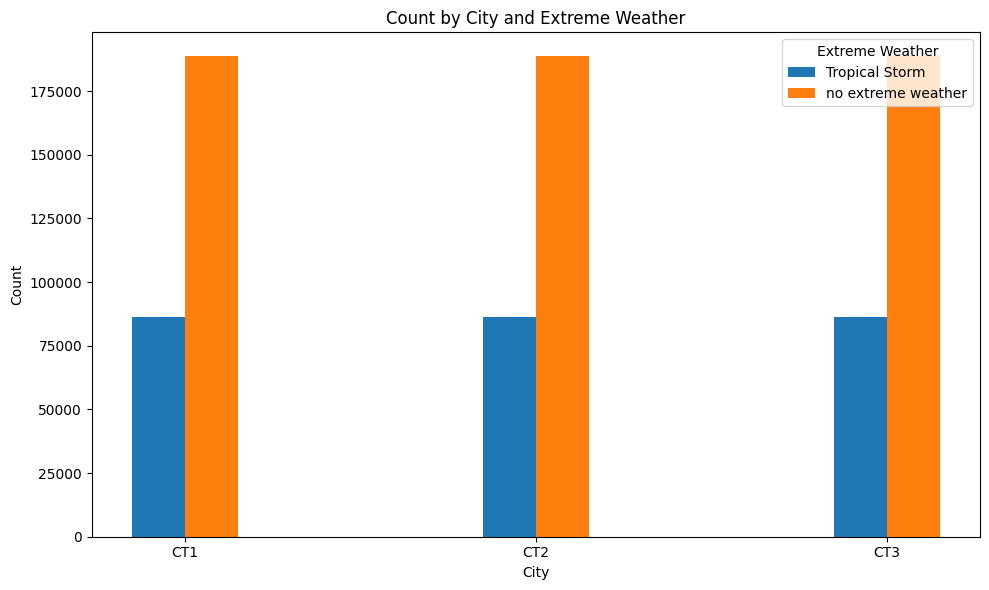

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Assume count_df is already created as:
# count_df = weather_data.groupby(['City', 'Extreme Weather' ,'Condition']).size().reset_index(name='Count')

# For each city, plot bars for each Extreme Weather, colored by Extreme Weather, grouped by City
cities = count_df['City'].unique()
extreme_weathers = count_df['Extreme Weather'].unique()

bar_width = 0.15
x = np.arange(len(cities))

fig, ax = plt.subplots(figsize=(10, 6))

for i, ew in enumerate(extreme_weathers):
    # Filter data for this extreme weather
    ew_data = count_df[count_df['Extreme Weather'] == ew]
    # For each city, sum all counts for this extreme weather (across all conditions)
    heights = []
    for city in cities:
        val = ew_data[ew_data['City'] == city]['Count'].sum()
        heights.append(val)
    # Offset each group by i*bar_width
    positions = x + i * bar_width
    ax.bar(positions, heights, width=bar_width, label=ew)

ax.set_xticks(x + bar_width * (len(extreme_weathers)-1)/2)
ax.set_xticklabels(cities)
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_title('Count by City and Extreme Weather')
ax.legend(title='Extreme Weather')
plt.tight_layout()
plt.show()




In [62]:
count_df

,City,Extreme Weather,Condition,Count
0,CT1,Tropical Storm,Blowing Dust / Windy,2
1,CT1,Tropical Storm,Cloudy,8044
2,CT1,Tropical Storm,Cloudy / Windy,70
3,CT1,Tropical Storm,Drizzle,12
4,CT1,Tropical Storm,Fair,19401
...,...,...,...,...
134,CT3,no extreme weather,Showers in the Vicinity,558
135,CT3,no extreme weather,T-Storm,352
136,CT3,no extreme weather,T-Storm / Windy,23
137,CT3,no extreme weather,Thunder,97


In [63]:
#Add month name to weather_data (e.g., 'January')
weather_data['Month_Name'] = weather_data['Time'].dt.month_name()

In [64]:
# Group by city & month
city_pattern = weather_data.groupby('City').size().reset_index(name='Count City')
monthly_pattern = weather_data.groupby('Month_Name').size().reset_index(name='Count by Mth Name')


# Display the first few rows of each grouped DataFrame
print(city_pattern.head())
print(monthly_pattern.head())


  City  Count City
0  CT1      274751
1  CT2      274751
2  CT3      274751
  Month_Name  Count by Mth Name
0      April              69120
1     August              71424
2   December              62496
3   February              65088
4    January              71424


In [65]:
# Filter for 'Fair' and no extreme weather
fair_no_extreme = weather_data[
    (weather_data['Condition'] == 'Fair') & 
    (weather_data['Extreme Weather'] == 'no extreme weather')
]

fair_any_extreme = weather_data[
    (weather_data['Condition'] == 'Fair') & 
    (weather_data['Extreme Weather'] != 'no extreme weather')
] 
# Group by City and count
city_fair_no_extreme_count = fair_no_extreme.groupby('City').size().reset_index(name='Fair No Extreme by Extreme Weathe')
city_fair_any_extreme_count = fair_any_extreme.groupby('City').size().reset_index(name='Fair any Extreme by Extreme Weathe')

# Merge the two DataFrames on 'City' with an outer join
result_df = pd.merge(city_fair_no_extreme_count, city_fair_any_extreme_count, on='City', how='outer')
# Convert counts to integer type
print('How many "Fair" conditions is related with Extreme Weather: \n')
result_df['Fair No Extreme by Extreme Weathe'] = result_df['Fair No Extreme by Extreme Weathe'].astype(int)
result_df['Fair any Extreme by Extreme Weathe'] = result_df['Fair any Extreme by Extreme Weathe'].astype(int)
result_df


How many "Fair" conditions is related with Extreme Weather: 



,City,Fair No Extreme by Extreme Weathe,Fair any Extreme by Extreme Weathe
0,CT1,82841,19401
1,CT3,100444,26735


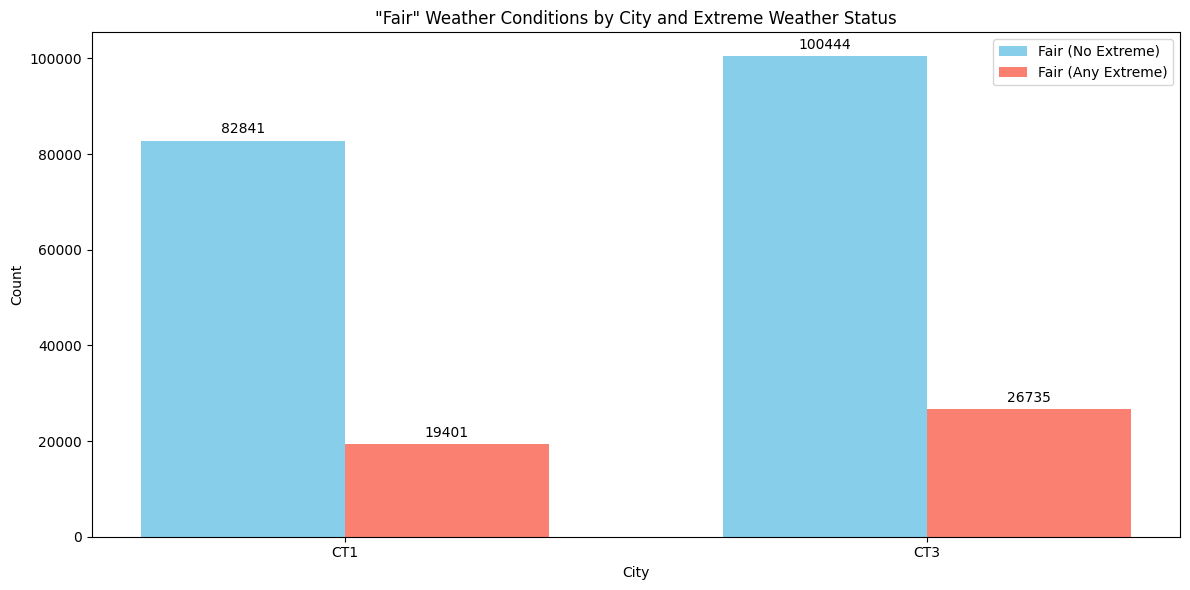

In [66]:
# Prepare data
cities = result_df['City']
no_extreme = result_df['Fair No Extreme by Extreme Weathe']
any_extreme = result_df['Fair any Extreme by Extreme Weathe']

# Set up plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(cities))

# Create bars
bars1 = ax.bar(x - bar_width/2, no_extreme, bar_width, label='Fair (No Extreme)', color='skyblue')
bars2 = ax.bar(x + bar_width/2, any_extreme, bar_width, label='Fair (Any Extreme)', color='salmon')

# Add labels and title
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_title('"Fair" Weather Conditions by City and Extreme Weather Status')
ax.set_xticks(x)
ax.set_xticklabels(cities)
ax.legend()

# Add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [67]:
# Extract hour and month from Time
weather_data['Hour'] = weather_data['Time'].dt.hour
weather_data['Month'] = weather_data['Time'].dt.month

In [ ]:
weather_data

,Time,Temperature(C),Dew Point(C),Humidity(%),Wind,Wind Speed(mph),Wind Gust(mph),Pressure(hPa),Condition,City,Extreme Weather,EWno,Month,Hour
0,2015-01-01 00:00:00,11.76,4.01,59.12,CALM,0.00,0.0,1020.66,Fair,CT1,no extreme weather,0,1,0
1,2015-01-01 00:15:00,11.52,3.97,60.90,CALM,1.97,0.0,1012.19,Fair,CT1,no extreme weather,0,1,0
2,2015-01-01 00:30:00,11.28,3.92,62.68,ESE,3.94,0.0,1003.73,Fair,CT1,Tropical Storm,8,1,0
3,2015-01-01 00:45:00,11.89,3.92,59.82,ESE,2.96,0.0,1005.76,Fair,CT1,no extreme weather,0,1,0
4,2015-01-01 01:00:00,12.49,3.92,56.97,VAR,1.97,0.0,1007.79,Fair,CT1,no extreme weather,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824248,2022-11-01 22:30:00,20.58,18.25,88.99,N,25.09,0.0,995.26,Partly Cloudy / Windy,CT3,Tropical Storm,8,11,22
824249,2022-11-01 22:45:00,20.02,17.91,88.90,N,26.58,0.0,993.57,Partly Cloudy / Windy,CT3,Tropical Storm,8,11,22
824250,2022-11-01 23:00:00,19.46,17.57,88.82,N,28.07,0.0,991.53,Partly Cloudy / Windy,CT3,Tropical Storm,8,11,23
824251,2022-11-01 23:15:00,20.11,17.99,88.94,N,28.55,0.0,997.29,Partly Cloudy / Windy,CT3,Tropical Storm,8,11,23
